# Optimization Under Uncertainty

## 1    Polynomial Chaos

Polynomial chaos (PC) is the name of an Uncertainty Quantification (UQ) method that approximates a function with a polynomial expansion made up of orthogonal polynomials. This function has \textit{random variables} as inputs, and we are interested in the effects of the random (uncertain) inputs on the output of this function. Statistics of the output can describe the effects of the inputs. We use the polynomial chaos method to efficiently compute these statistics and the gradients of these statistics.

We first describe the polynomial chaos method for the case of a 1-dimensional random input and then for the $n$-dimensional random input case. We then discuss two methods &mdash; quadrature and regression &mdash; to compute the coefficients used in the PC expansion. We finish with an extension of polynomial chaos to compute gradients.

### 1.1    $1$-dimensional polynomial chaos

Let $R(\xi)$ be a function of interest that depends on the uncertain variable $\xi$. We can approximate the function by a polynomial expansion

\begin{equation}
  R(\xi) \approx \hat{R}(\xi) = \sum_{i=0}^p \alpha_i \phi_i(\xi) \quad \quad \quad \quad \quad(1).
\end{equation}

The approximate response $\hat{R}(\xi)$ is a polynomial of order $p$. Usually, the larger the polynomial order the closer the approximation is to the true response $R(\xi)$.

The polynomial basis $ {\{\phi_i(\xi)\}}_{i=0}^p $ is determined by the distribution of the uncertain variable---the polynomial basis is orthogonal with a weight function that corresponds up to a constant to the probability density function of the uncertain variable. Common random (uncertain) variables (Normal, Uniform, Exponential, Beta) have corresponding classical orthogonal polynomials (Hermite, Legendre, Laguerre, Jacobi) [4]. 
It is necessary to numerically generate orthogonal polynomials for uncertain variables with empirically-determined distributions, such as those obtained from wind conditions, to preserve the optimal convergence property of the polynomial chaos expansion [4]. Also, the use of orthogonal polynomials allows us to analytically compute statistics from the polynomial chaos expansion (section 1.1.1). Details about the numerical generation of orthogonal polynomials can be found in [1]. In addition to the orthogonal polynomials, the other component of the expansion (1) are the coefficients $\alpha_i$. The coefficients can be computed either by quadrature or regression as described in section 1.3.

Once the coefficients are computed, we use the polynomial expansion (1) to inexpensively compute statistics of our function of interest. The mean and variance are a function of the coefficients $\alpha_i$ and are obtained analytically by integrating the expansion and using the orthogonality of the polynomials. Other statistics such as probabilities can be estimated by sampling the polynomial expansion.

#### 1.1.1    Mean and variance from the polynomial chaos expansion

The mean or expected value of our function $R(\xi)$ is defined by

\begin{equation}
    \mu_R = \mathrm{E}[R] = \int_\Omega R(\xi) \rho(\xi)\, d\xi \quad \quad \quad \quad \quad(2),
\end{equation}

where $\rho(\xi)$ is the probability density function, and $\Omega$ is the domain of the random variable $\xi$.
Substituting the polynomial approximation (1) of the function into the mean, we obtain

\begin{equation}
  \mu_R = \int_\Omega \sum_{i=0}^p \alpha_i \phi_i(\xi) \rho(\xi)\, d\xi \quad \quad \quad \quad \quad(3).
\end{equation}

To simplify this expression, we define the inner product $\left<f, g\right> = \int_\Omega f(\xi)g(\xi)\rho(\xi)\, d\xi $, and we will use the following: $\phi_0 = 1$ by definition, $ \int_\Omega \rho(\xi)\, d\xi = 1 $ by definition of probability density function and the orthogonality of the polynomials

\begin{equation}
  \left<\phi_i, \phi_j\right> = \left<\phi_i^2\right>\delta_{ij}, \qquad \delta_{ij} =
    \begin{cases}
    1, &         \text{if } i=j,\\
    0, &         \text{if } i\neq j \quad \quad \quad \quad \quad(4),
    \end{cases}
\end{equation}

from which it follows that

\begin{equation}
  \left<\phi_0, \phi_j\right> = \left<1, \phi_j\right> = \left<\phi_j\right> = 0, \qquad \text{for } j\neq0 \quad \quad \quad \quad \quad(5).
\end{equation}

Now, we proceed to simplify (3) to obtain

\begin{equation}
\begin{alignedat}{2}
  \mu_R & = \int_\Omega \sum_{i=0}^p \alpha_i \phi_i(\xi) \rho(\xi)\, d\xi \\
    & = \sum_{i=0}^p \alpha_i \int_\Omega \phi_i(\xi) \rho(\xi)\, d\xi \\
  & = \alpha_0 \int_\Omega \phi_0(\xi) \rho(\xi)\, d\xi + \alpha_1 \int_\Omega \phi_1(\xi) \rho(\xi)\, d\xi + \cdots + \alpha_p \int_\Omega \phi_p(\xi) \rho(\xi)\, d\xi \\
  & = \alpha_0 \int_\Omega \rho(\xi)\, d\xi + \alpha_1 \int_\Omega 1\cdot\phi_1(\xi) \rho(\xi)\, d\xi + \cdots + \alpha_p \int_\Omega 1\cdot\phi_p(\xi) \rho(\xi)\, d\xi \\
  & = \alpha_0\cdot 1 + \alpha_1 \left<1,\phi_1\right> + \cdots + \alpha_p \left<1,\phi_p\right> \\
  & = \alpha_0 + 0 + \cdots + 0 \\
  \mu_R & = \alpha_0 \quad \quad \quad \quad \quad(6).
\end{alignedat}
\end{equation}

The mean is the zeroth coefficient.

The variance is defined by

\begin{equation}
\begin{alignedat}{2}
    \sigma_R^2 = \mathrm{Var}[R] & = \mathrm{E}[{(R(\xi) - \mathrm{E}[R(\xi)])}^2] \\
  & = \mathrm{E}[R{(\xi)}^2] - {(\mathrm{E}[R(\xi)])}^2 \\
  & = \int_\Omega R{(\xi)}^2 \rho(\xi)\, d\xi - \mu_R^2 \quad \quad \quad \quad \quad(7)
\end{alignedat}
\end{equation}

Substituting the polynomial approximation (1) of the function and the mean (6) into the variance we obtain

\begin{equation}
\begin{alignedat}{2}
  \sigma_R^2 & = \int_\Omega \sum_{i=0}^p \alpha_i^2 \phi_i{(\xi)}^2 \rho(\xi)\, d\xi - \alpha_0^2 \\
  & = \sum_{i=0}^p \alpha_i^2 \int_\Omega \phi_i{(\xi)}^2 \rho(\xi)\, d\xi - \alpha_0^2 \\
  & = \alpha_0^2 \int_\Omega \phi_0{(\xi)}^2\rho(\xi)\, d\xi + \sum_{i=1}^p \alpha_i^2 \int_\Omega \phi_i{(\xi)}^2 \rho(\xi)\, d\xi - \alpha_0^2 \\
  & = \alpha_0^2 \cdot 1 + \sum_{i=1}^p \alpha_i^2 \int_\Omega \phi_i{(\xi)}^2 \rho(\xi)\, d\xi - \alpha_0^2 \\
  & = \sum_{i=1}^p \alpha_i^2 \int_\Omega \phi_i{(\xi)}^2 \rho(\xi)\, d\xi \\
  \sigma_R^2 & = \sum_{i=1}^p \alpha_i^2 \left<\phi_i^2(\xi)\right> \quad \quad \quad \quad \quad(8). 
  \end{alignedat}
  \end{equation}
  
The variance is the sum of the product of the coefficients &mdash; excluding the zeroth coefficient &mdash; with the inner product $\left<\phi_i^2(\xi)\right>$. For a particular polynomial basis, this inner product is easily computed either analytically or by quadrature. Furthermore, the classical orthogonal polynomials have simple relationships for the inner products [6].


#### 1.1.2 Chaospy Implemetation

Chaospy is a numerical tool for performing uncertainty quantification using polynomial chaos expansions and advanced Monte Carlo methods implemented in Python 2 and 3.

##### Installation 

$ pip install chaospy

$ pip install scikit-learn

Documentation: https://media.readthedocs.org/pdf/chaospy/master/chaospy.pdf

In [10]:
import chaospy as cp

# create distribution for random variable

dist = cp.Uniform(-1,1)   # uniformly distributed random variable
expansion  = cp.orth_ttr(2, dist) # second order expansion (ttr = total order expansion)

print expansion

[1.0, q0, q0^2-0.333333333333]


This is the second order expansion for a uniformly distributed random variable.


### 1.2     $n$-dimensional polynomial chaos

For the case of multiple uncertain variables $\boldsymbol{\xi} = (\xi_1,\xi_2,\ldots,\xi_n)$ and using a multi-index $\mathbf{i}=(i_1,i_2,\ldots,i_n)$, we write the multi-dimensional polynomial approximation as

\begin{equation}
  R(\boldsymbol{\xi}) \approx \hat{R}(\boldsymbol{\xi}) = \sum_{\mathbf{i}\in \mathcal{I}_p} \alpha_\mathbf{i} \Phi_\mathbf{i}(\boldsymbol{\xi}). 
\end{equation}

The multi-dimensional basis functions $\Phi_\mathbf{i}(\boldsymbol{\xi})$ are given by products of the $1$-dimensional orthogonal polynomials

\begin{equation}
    \Phi_\mathbf{i}(\boldsymbol{\xi})  = \prod_{j=1}^n \phi_{i_j}(\xi_j).
\end{equation}

The multi-dimensional basis functions are also orthogonal when the uncertain variables are independent[1].
The values of the elements $i_j$ of the multi-index depend on how the expansion is truncated, i.e., on how the index set $\mathcal{I}_p$ is defined. There are two common ways in which to define the index set: *total-order expansion* and *tensor-product expansion*.

In *total-order expansion* a total polynomial order bound $p$ is enforced:

\begin{equation}
    \mathcal{I}_p = \{\mathbf{i}:|\mathbf{i}| \leq p \}, \qquad |\mathbf{i}|=i_1+i_2+\cdots +i_n.
\end{equation}

For a second-order expansion $p=2$ over two uncertain dimensions $n=2$, the index set is

\begin{equation}
  \mathcal{I}_p = \left \{\begin{array}{c}
    (i_1=0,i_2=0),(i_1=1,i_2=0),(i_1=0,i_2=1),\\
    (i_1=2,i_2=0),(i_1=1,i_2=1),(i_1=0,i_2=2)
\end{array}\right \},
\end{equation}

which produces the following multi-dimensional basis polynomials:

\begin{equation}
\begin{alignedat}{2}
  \Phi_\mathbf{0}(\boldsymbol{\xi}) & = \phi_0(\xi_1) \phi_0(\xi_2) & & = 1 \\
  \Phi_\mathbf{1}(\boldsymbol{\xi}) & = \phi_1(\xi_1) \phi_0(\xi_2) & & = \xi_1 \\
  \Phi_\mathbf{2}(\boldsymbol{\xi}) & = \phi_0(\xi_1) \phi_1(\xi_2) & & = \xi_2 \\
  \Phi_\mathbf{3}(\boldsymbol{\xi}) & = \phi_2(\xi_1) \phi_0(\xi_2) & & = \xi_1^2-1 \\
  \Phi_\mathbf{4}(\boldsymbol{\xi}) & = \phi_1(\xi_1) \phi_1(\xi_2) & & = \xi_1 \xi_2 \\
  \Phi_\mathbf{5}(\boldsymbol{\xi}) & = \phi_0(\xi_1) \phi_2(\xi_2) & & = \xi_2^2-1.
\end{alignedat}
\end{equation}

The last column of \cref{eq:totalOrderExample} depends on the type of the univariate polynomials. The ones shown are the $1$-dimensional Hermite polynomials that correspond to Normal uncertain variables.
The corresponding *total-order* polynomial approximation is

\begin{equation}
  \hat{R}(\boldsymbol{\xi}) = \sum_{\mathbf{i}=\mathbf{0}}^{\mathbf{5}}\alpha_\mathbf{i} \Phi_\mathbf{i}(\boldsymbol{\xi}) = \alpha_{\mathbf{0}} \Phi_\mathbf{0}(\boldsymbol{\xi}) + \alpha_{\mathbf{1}} \Phi_\mathbf{1}(\boldsymbol{\xi}) + \cdots + \alpha_{\mathbf{5}} \Phi_\mathbf{5}(\boldsymbol{\xi}).
\end{equation}

The total number of terms in an expansion of total order $p$ and involving $n$ uncertain variables is given by

\begin{equation}
    N_{TO} = \frac{(n+p)!}{n!p!}.
\end{equation}

In *tensor-product expansion* a per-dimension polynomial order bound $p_j$ is enforced

\begin{equation}
    \mathcal{I}_p = \{\mathbf{i}:i_j \leq p_j, \; j=1,\ldots ,n \}.
\end{equation}

For a second-order expansion $p=2$ over two uncertain dimensions $n=2$, the index set is

\begin{equation}
  \mathcal{I}_p = \left \{\begin{array}{c}
    (i_1=0,i_2=0),(i_1=1,i_2=0),(i_1=2,i_2=0),\\
    (i_1=0,i_2=1),(i_1=1,i_2=1),(i_1=2,i_2=1),\\
    (i_1=0,i_2=2),(i_1=1,i_2=2),(i_1=2,i_2=2)
\end{array}\right \}
\end{equation}

which produces the following multi-dimensional basis polynomials:

\begin{equation}
\begin{alignedat}{2}
  \Phi_\mathbf{0}(\boldsymbol{\xi}) & = \phi_0(\xi_1) \phi_0(\xi_2) & & = 1 \\
  \Phi_\mathbf{1}(\boldsymbol{\xi}) & = \phi_1(\xi_1) \phi_0(\xi_2) & & = \xi_1 \\
  \Phi_\mathbf{2}(\boldsymbol{\xi}) & = \phi_2(\xi_1) \phi_0(\xi_2) & & = \xi_1^2-1 \\
  \Phi_\mathbf{3}(\boldsymbol{\xi}) & = \phi_0(\xi_1) \phi_1(\xi_2) & & = \xi_2 \\
  \Phi_\mathbf{4}(\boldsymbol{\xi}) & = \phi_1(\xi_1) \phi_1(\xi_2) & & = \xi_1 \xi_2 \\
  \Phi_\mathbf{5}(\boldsymbol{\xi}) & = \phi_2(\xi_1) \phi_1(\xi_2) & & = (\xi_1^2-1)\xi_2 \\
  \Phi_\mathbf{6}(\boldsymbol{\xi}) & = \phi_0(\xi_1) \phi_2(\xi_2) & & = \xi_2^2-1 \\
  \Phi_\mathbf{7}(\boldsymbol{\xi}) & = \phi_1(\xi_1) \phi_2(\xi_2) & & = \xi_1 (\xi_2^2-1) \\
  \Phi_\mathbf{8}(\boldsymbol{\xi}) & = \phi_2(\xi_1) \phi_2(\xi_2) & & = (\xi_1^2-1) (\xi_2^2-1).
\end{alignedat}
\end{equation}

The last column of \cref{eq:tensorOrderExample} depends on the type of the univariate polynomials. The ones shown are the $1$-dimensional Hermite polynomials that correspond to Normal uncertain variables.
The corresponding *tensor-product* polynomial approximation is

\begin{equation}
  \hat{R}(\boldsymbol{\xi}) = \sum_{\mathbf{i}=\mathbf{0}}^{\mathbf{8}}\alpha_\mathbf{i} \Phi_\mathbf{i}(\boldsymbol{\xi}) = \alpha_{\mathbf{0}} \Phi_\mathbf{0}(\boldsymbol{\xi}) + \alpha_{\mathbf{1}} \Phi_\mathbf{1}(\boldsymbol{\xi}) + \cdots + \alpha_{\mathbf{8}} \Phi_\mathbf{8}(\boldsymbol{\xi}).
\end{equation}

The total number of terms for the *tensor-product expansion* is given by

\begin{equation}
    N_{TP} = \prod_{i=1}^n (p_i+1).
\end{equation}

Note that for both *total-order expansion* and *tensor-product expansion* the number of terms exhibits an exponential increase with an increase in the number of uncertain dimensions $n$. This result is known as the *curse of dimensionality*. The *tensor-product expansion* is the preferred approach when the coefficients are computed with quadrature (\cref{sec:PCcoeffQuad}) because of increased monomial coverage and accuracy[7]. The *total-order expansion* is the preferred approach when the coefficients are computed with regression (\cref{sec:PCcoeffReg}) because it keeps the sampling requirements lower[7].

#### 1.2.1     Mean and variance from the polynomial chaos expansion

Similarly to the $1$-dimensional expansion, the statistics of the multi-dimensional polynomial chaos expansion \cref{eq:ND_expansion} are a function of the coefficients and are obtained analytically

\begin{equation}
  \mu_R = \alpha_{\mathbf{0}}
\end{equation}

and

\begin{equation}
  \sigma_R^2 = \sum_{\mathbf{i}\in \mathcal{I}_p\setminus \mathbf{\{0\}}}
\alpha_{\mathbf{i}}^2\left<\Phi_\mathbf{i}^2(\boldsymbol{\xi})\right>,
\end{equation}

where $\mathbf{0}$ is the first multi-index---the one with all zero elements. 

These coefficients are obtained below using chaospy for the case of two random normal variables. As this is for illustrative purposes only we will proceed by simply creating a second order orthogonal expansion, then print out the first two expansion coefficients, mean and variance.


In [79]:
# create distributions for random variables
x1 = cp.Normal(0,1)
x2 = cp.Normal(0,1)

dist1 = cp.J(x1, x2)   # cdf of Normaly distributed random variables 

dist2 = cp.Iid(cp.Normal(0,1), 2) # if both variabled share the exact same distribution

# Orthogonal Polynomial Expansion
expansion1  = cp.orth_ttr(2, dist1) # second order expansion for two random variables read the docs (ttr = three term Stiltjes recursion for total order expansion) 
expansion2  = cp.orth_ttr(2, dist2)

print "expansion1:", expansion1
print "expansion2:", expansion2

expansion1: [1.0, q1, q0, -1.0+q1^2, q0q1, q0^2-1.0]
expansion2: [1.0, q1, q0, -1.0+q1^2, q0q1, q0^2-1.0]


Where we have shown that either syntax (lines 9 and 11) can be used to create the identical polynomial chaos expansions as shown above. The form used in creating "dist2" (and subsequently "expansion2") only works for groups of random variables with the same  distribution. Whereas those in lines 9 and 14 are general. 

In [80]:
# mean and variance

q0, q1 = cp.variable(2)  # chaospy sets 'q' as the default independent variable

mean = np.array([cp.E(q0, dist1), cp.E(q1, dist1)])    # mean/expected value
std = np.array([cp.Std(q0, dist1), cp.Std(q1, dist1)])   # variance

print 'mean: %s, variance: %s' % (mean, std)

mean: [0. 0.], variance: [1. 1.]


We could just as well create heterogeneous joint distributions; which is generally the case in real-world engineering problems. Let us consider the case of a system with one normal RV, and another uniformly distributed. 

In [81]:
# create distribution for random variables
y1 = cp.Normal(0,1)
y2 = cp.Uniform(0,1)

J_dist = cp.J(y1, y2)   # joint density function 

expansion  = cp.orth_ttr(2, J_dist)  # 2nd order expansion

print expansion

[1.0, q1-0.5, q0, -q1+0.166666666667+q1^2, -0.5q0+q0q1, q0^2-1.0]


### 1.3     Calculating polynomial chaos coefficients

The coefficients of the polynomial chaos expansion
\begin{equation}
  R(\boldsymbol{\xi}) \approx \hat{R}(\boldsymbol{\xi}) = \sum_{\mathbf{i}\in \mathcal{I}_p} \alpha_\mathbf{i} \Phi_\mathbf{i}(\boldsymbol{\xi}).
\end{equation}
can be calculated via quadrature or by linear regression. The quadrature approach is also known as non-intrusive spectral projection, spectral projection, pseudospectral, stochastic Galerkin, etc. The regression approach is sometimes also referred to as stochastic response surfaces, point collocation or compressed sensing.

#### 1.3.1     Quadrature

To obtain the coefficients of the polynomial chaos expansion

\begin{equation}
  R(\boldsymbol{\xi}) = \sum_{\mathbf{i}\in \mathcal{I}_p}  \alpha_\mathbf{i} \Phi_\mathbf{i}(\boldsymbol{\xi}),
\end{equation}

via quadrature, we take the inner product of both sides of \cref{eq:forProjection} with respect to $\Phi_\mathbf{j}(\boldsymbol{\xi})$ to yield\footnote{This projection gives the other names for the quadrature approach.}\todo{AN: what does this footnote mean?}

\begin{equation}
  \left<R,\Phi_\mathbf{j}\right> = \sum_{\mathbf{i}\in \mathcal{I}_p}  \alpha_\mathbf{i}  \left<\Phi_\mathbf{i}, \Phi_\mathbf{j}\right>.
\end{equation}

Making use of the orthogonality of the polynomials

\begin{equation}
  \left<\Phi_\mathbf{i}, \Phi_\mathbf{j}\right> =
  \begin{cases}
    0 & \text{for } i\neq j \\
    \left<\Phi_\mathbf{i}, \Phi_\mathbf{i}\right> =
      \left<\Phi_\mathbf{i}^2\right> & \text{for } i = j.
  \end{cases}
\end{equation}

and solving for the coefficients in \cref{eq:PCprojection}, we obtain

\begin{equation}
  \alpha_\mathbf{i} = \frac{\left<R(\boldsymbol{\xi}),\Phi_\mathbf{i}(\boldsymbol{\xi})\right>}{\left<\Phi_\mathbf{i}^2(\boldsymbol{\xi})\right>} =
  \frac{1}{{\left<\Phi_\mathbf{i}^2(\boldsymbol{\xi})\right>}}
  \int_\Omega R(\boldsymbol{\xi}) \Phi_\mathbf{i}(\boldsymbol{\xi}) \rho(\boldsymbol{\xi})\, d\boldsymbol{\xi},
\end{equation}

where the domain $\Omega$ is the Cartesian product of $1D$ domains $\Omega_j$ for each dimension, $\Omega = \Omega_1 \times \cdots \times \Omega_n$, and $\rho(\boldsymbol{\xi}) = \prod_{j=1}^n\rho_j(\xi_j)$ is the joint probability density of the stochastic parameters. The inner product $\left<\Phi_\mathbf{i}^2(\boldsymbol{\xi})\right>$ is known analytically or inexpensively computed. Thus, most of the computational expense in solving for the coefficients resides in evaluating the model $R(\boldsymbol{\xi})$ in the multi-dimensional integral

\begin{equation}
  \int_\Omega R(\boldsymbol{\xi}) \Phi_\mathbf{i}(\boldsymbol{\xi})
  \rho(\boldsymbol{\xi})\, d\boldsymbol{\xi}.
\end{equation}

This integral is solved with quadrature (numerical integration).  We discuss two multi-dimensional quadrature approaches, tensor product quadrature and sparse grid quadrature.
Note that the zero coefficient in \cref{eq:coefficients} reduces to the definition of the mean

\begin{equation}
  \mu_R = \alpha_0 = \int_\Omega R(\boldsymbol{\xi}) \rho(\boldsymbol{\xi})\, d\boldsymbol{\xi},
\end{equation}

which the direct numerical integration methods attempt to compute directly (\cref{sec:directIntegration}).

**Tensor product quadrature**.
Let $\mathcal{U}^i f$ be a quadrature operator with $m_i$ points that approximates a one-dimensional integral

\begin{equation}
  \mathcal{U}^i f(\xi) \equiv \sum_{j=1}^{m_i} f(\xi_j^i)w_j^i \approx \int_\Omega f(\xi)\rho(\xi)\, d\xi.
\end{equation}

Then for approximating an $n$-dimensional integral, we create a tensor product of the 1-dimensional quadrature operators

\begin{equation}
  \mathcal{Q}^n f(\boldsymbol{\xi}) \equiv (\mathcal{U}^{i_1} \otimes \cdots \otimes \mathcal{U}^{i_n}) f(\boldsymbol{\xi}) = \sum_{j_1=1}^{m_{i_1}} \cdots \sum_{j_n=1}^{m_{i_n}} f(\xi_{j_1}^{i_1},\ldots,\xi_{j_n}^{i_n})(w_{j_1}^{i_1} \ldots w_{j_n}^{i_n}).
\end{equation}

We observe that the tensor product results in summations over all possible combinations of the indices, which results in $\prod_{k=1}^n m_{i_k}$ function evaluations. If all univariate integrations are of the same order $m_{i_k}=m$, then $m^n$ function evaluations are needed to evaluate the multi-dimensional integral numerically. As mentioned above, this exponential increase with the increase in the number of dimensions $n$ is known as the *curse of dimensionality* and renders tensor product quadrature impractical when $n$ is large. To alleviate the *curse of dimensionality* sparse grid methods have been developed (see below).

A commonly used quadrature operator is Gaussian quadrature because for $m$ points (nodes, function evaluations) it can exactly integrate polynomials of degree $2m-1$.
For Gaussian quadrature, the nodes locations $\xi_j$ and the weights $w_j>0$ depend on the domain of integration and the weight (density) function $\rho(\xi)$.

When the function evaluation is expensive, and when one is performing a convergence study of the integration, it is desired to be able to reuse the quadrature points of the lower order quadrature. A drawback of Gaussian quadrature is that the quadrature points distribution depends on the number of points $m$, i.e., the model evaluations at the nodes $\xi_j$ for the $m$-point integration cannot be reused in another integration involving a different number of nodes. Nested integration rules overcome this problem by enforcing that the nodes of a given quadrature also feature as nodes of higher-order formulas. The drawback of nested rules is that with $m$ points they can only exactly integrate polynomials up to order $m-1$.
In practice, this is not a big drawback as the model $R$ is rarely a polynomial and thus the integrand, \cref{eq:integrand}, is not polynomial. For this reason achieving the maximum polynomial degree of exactness does not necessarily produce higher  accuracy [9]. Examples of nested quadrature are Genz-Keister for normal uncertain variables and Gauss-Patterson for uniform variables.

**Sparse grids**.
Sparse grids is a particular type of quadrature that is based on linear combinations of tensor product quadrature operators that result in a significantly smaller number of nodes (function evaluations) while preserving as high a level of accuracy as tensor product quadrature [10, 11]. The first method to produce sparse grids was proposed by [12] in the context of multi-dimensional quadrature and interpolation.
The sparse grid quadrature method can be written as [8].

\begin{equation}
  \mathcal{S}(l,n) = \sum_{l+1\leq |\mathbf{i}| \leq l+n} {(-1)}^{l+n-|\mathbf{i}|}
  \mathbf{i}nom{n-1}{l+n-|\mathbf{i}|}\cdot (\mathcal{U}^{i_1} \otimes \cdots \otimes \mathcal{U}^{i_n}),
\end{equation}

where $l$ is the level of the sparse grid ($l \in \{0, 1 ,2 , \ldots \}$). Increasing the level of the sparse grid increases the number of quadrature points. The indices $i_k$ define which quadrature is used for the $k$ dimension. These indices are grouped in the multi-index $\mathbf{i}=(i_1,i_2,\ldots,i_n)$, for which we define $|\mathbf{i}|=i_1+i_2+ \cdots +i_n$. The relationship between the index $i_k$ and the number of quadrature points $m_{i_k}$ is called the growth rule and is dependent on the quadrature rule used. If the quadrature points are chosen based on a nested quadrature rule, then a nonlinear growth rule results, which approximately doubles $m_{i_k}$ with every increment in $i_k$ (e.g., $m_{i_k}=2^{i_k+1}-1$). If the quadrature points are based on a non-nested quadrature rule, then a linear growth rule results, which allows for finer granularity in the number of points used (e.g., $m_{i_k}=2i_k+1$).

A comparison between tensor grids (tensor product quadrature) and sparse grids in the context of polynomial chaos can be found in [4, 13], these references include the visualization of the tensor and sparse grids for two-dimensional problems.

#### Example problem

Consider the differential equation 

\begin{equation}
 \frac{du(x)}{dx} = -au(x), \quad u(0)=I
\end{equation}
 
 with the solution
 
 \begin{equation}
 u(x)=Ie^{-ax}
 \end{equation}
 
 where the two random input variables are uniformly distributed:

\begin{equation}
a \sim U(0, 0.1), \quad and \quad I\sim U(8,10)
\end{equation}

We want to compute the mean $E(u)$, and variance $Var(u)$. 

In [82]:
# The model
def U(x, a, I):
    return I*np.exp(-a*x)

x = np.linspace(0, 30, 1000)    # range of x values


# Distributions:
a = cp.Uniform(0, 0.1)
I = cp.Uniform(8, 10)
dist = cp.J(a, I)        # Joint distibution

We will use the Monte Carlo capabilities of chaospy to find the mean and variance for comparison.

In [83]:
# Monte Carlo (mc)
samples = dist.sample(10**5)     # sample form joint distribution

U_mc = [U(x, *s) for s in samples.T]      # run the model for each sample

mean_mc = np.mean(U_mc, 0)      # mean and variance
var_mc = np.var(U_mc, 0)

# print "Mean_mc-",mean

We now proceed to calculate the mean and variance as described in section $1.3.1$ using a $~3^{rd}-order$ polynomial approximation of the solution.

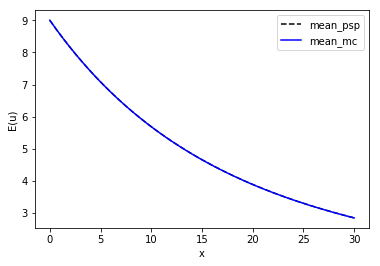

In [84]:
# Pseudo-Spectral projection (psp)  

order = 3
poly1, norms = cp.orth_ttr(order, dist, retall=True)                #polynomial and norms
nodes, weights = cp.generate_quadrature(order+1, dist, rule="G")    # nodes and weights for gaussian quadrature

# print poly1

solves = [U(x, s[0], s[1]) for s in nodes.T]
U_hat = cp.fit_quadrature(poly1, nodes, weights, solves, norms=norms)

# mean of the solution
mean_psp = cp.E(U_hat, dist)

plt.figure(1)
plt.plot(x, mean_psp, "k--", label="mean_psp")
plt.plot(x, mean_mc, "b", label="mean_mc")
plt.xlabel("x")
plt.ylabel("E(u)")
plt.legend()

plt.show()

The mean remains the same regardless of the order of approximation since the first coefficient does not change.

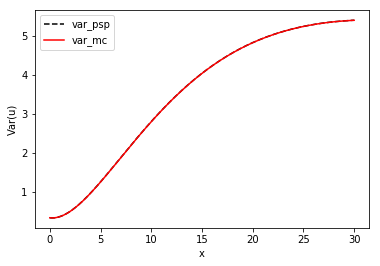

In [68]:
# variance
var_psp = cp.Var(U_hat, dist)

plt.figure(2)
plt.plot(x, var_psp, "k--", label="var_psp")
plt.plot(x, var_mc, "r", label="var_mc")
plt.xlabel("x")
plt.ylabel("Var(u)")
plt.legend()

plt.show()

The variance however depends on the polynomial expansion order as shown in the figure below for orders 0, 1, and 3.

![pcp.svg](attachment:pcp.svg)

Guidelines for choosing the appropriate expansion order?

#### 1.3.2     Regression

To obtain the coefficients of the polynomial chaos expansion

\begin{equation}
  R(\boldsymbol{\xi}) = \sum_{\mathbf{i}\in \mathcal{I}_p}  \alpha_\mathbf{i} \Phi_\mathbf{i}(\boldsymbol{\xi}),
\end{equation}

via regression, we construct a linear system

\begin{equation}
  \boldsymbol{\phi} \boldsymbol{\alpha} = R
\end{equation}

and solve for the coefficients $\boldsymbol{\alpha}$ that best represent a set of responses $R$. The set of responses is generated by evaluating the model at $m$ uncertain vectors $\boldsymbol{\xi}$. The uncertain vectors are most commonly chosen by sampling the density of the uncertain variables [26]. Different sampling methods can be used (\cref{sec:SamplingMethods}).
%or you can picked them to be the quadrature points which under certain conditions the coefficients obtained from the regression will be the same as from quadrature. I think the machine learning book has some details.

Each row of the matrix $\boldsymbol{\phi}$ contains the orthogonal polynomials $\Phi_\mathbf{j}$ evaluated at a sample $\boldsymbol{\xi}_i$

\begin{equation}
  \begin{bmatrix}
    \Phi_\mathbf{0}(\boldsymbol{\xi}_1) & \cdots & \Phi_\mathbf{n-1}(\boldsymbol{\xi}_1) \\
    \vdots & \ddots & \vdots \\
    \Phi_\mathbf{0}(\boldsymbol{\xi}_m)  &\cdots & \Phi_\mathbf{n-1}(\boldsymbol{\xi}_m)
  \end{bmatrix}
  \begin{bmatrix}
    \alpha_0 \\
    \vdots \\
    \alpha_{n-1}
    \end{bmatrix}
    =
  \begin{bmatrix}
    R_1 \\
    \vdots \\
    R_m
  \end{bmatrix}.
\end{equation}

The size of the $m \times n$ matrix is determined by the number of samples $m$ and by how the polynomial chaos expansion is truncated (\cref{sec:nd_pc}) which results in $n$ terms. It is common to specify a total order expansion along with a collocation ratio\footnote{Collocation ratio derives from collocation points which some authors use to refer to the sample points.} $cr = m/n$ to determine the number of samples $m$. The collocation ratio determines if the system is overdetermined $cr > 1$ or underdetermined $cr < 1$.

The most popular method to estimate the coefficients is *least squares*, in which we pick coefficients $\boldsymbol{\alpha}=(\alpha_0, \alpha_1, \dots, \alpha_{n-1})$ that minimize the residual sum of squares

\begin{equation}
  \boldsymbol{\alpha} = \text{arg min } ||\boldsymbol{\phi}\boldsymbol{\alpha} - R||_2^2.
\end{equation}

This problem has a closed-form solution obtained by solving the normal equations [27]

\begin{equation}
  \boldsymbol{\alpha} = {(\boldsymbol{\phi}^T \boldsymbol{\phi})}^{-1} \boldsymbol{\phi}^T R.
\end{equation}

For underdetermined systems, \cref{eq:linearsystem} has many solutions and we need to further constrain the problem. This can be done be setting a constraint on the coefficients

\begin{equation}
  \boldsymbol{\alpha} = \text{arg min } ||\boldsymbol{\phi}\boldsymbol{\alpha} - R||_2^2, \qquad \text{such that } ||\boldsymbol{\alpha}||_p \leq t.
\end{equation}

This constrained problem is equivalent to the regularized least squares problem [17]

\begin{equation}
  \boldsymbol{\alpha} = \text{arg min } ||\boldsymbol{\phi}\boldsymbol{\alpha} - R||_2^2 + \lambda ||\boldsymbol{\alpha}||_p^p.
\end{equation}

For $p=2$, \cref{eq:regularized} is known as Tikhonov regularization or ridge regression [14] and for $p=1$ as $l_1$-norm regularization or as lasso [15].

We will proceed by running the model for different sample sizes to establish the strong dependence of the regression method on proper sampling.

In [85]:
# Regression

order = 5
poly2 = cp.orth_ttr(order, dist)
nodes2 = dist.sample(len(poly2), "H")
nodes3 = dist.sample(3*len(poly2), "H")
nodes4 = dist.sample(5*len(poly2), "H")


solves2 = [U(x, s[0], s[1]) for s in nodes2.T]
solves3 = [U(x, s[0], s[1]) for s in nodes3.T]
solves4 = [U(x, s[0], s[1]) for s in nodes4.T]


U_hat2 = cp.fit_regression(poly2, nodes2, solves2, rule="T")
U_hat3 = cp.fit_regression(poly2, nodes3, solves3, rule="T")
U_hat4 = cp.fit_regression(poly2, nodes4, solves4, rule="T")


We have set up three different cases, each with a different sample size. 

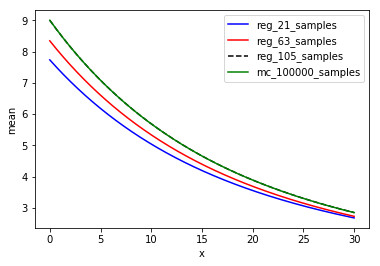

In [86]:
# mean
mean_reg2 = cp.E(U_hat2, dist)
mean_reg3 = cp.E(U_hat3, dist)
mean_reg4 = cp.E(U_hat4, dist)

plt.figure(1)
plt.plot(x, mean_reg2, "b", label="reg_21_samples")
plt.plot(x, mean_reg3, "r", label="reg_63_samples")
plt.plot(x, mean_reg4, "k--", label="reg_105_samples")
plt.plot(x, mean_mc, "g", label="mc_100000_samples")
plt.xlabel("x")
plt.ylabel("mean")
plt.legend()

plt.show()

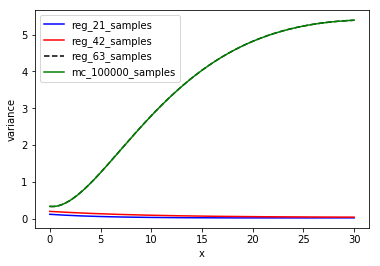

In [78]:
# variance
var_reg2 = cp.Var(U_hat2, dist)
var_reg3 = cp.Var(U_hat3, dist)
var_reg4 = cp.Var(U_hat4, dist)

plt.figure(2)
plt.plot(x, var_reg2, "b", label="reg_21_samples")
plt.plot(x, var_reg3, "r", label="reg_42_samples")
plt.plot(x, var_reg4, "k--", label="reg_63_samples")
plt.plot(x, var_mc, "g", label="mc_100000_samples")
plt.xlabel("x")
plt.ylabel("variance")
plt.legend()

plt.show()

Similarly to the least squares problem, the ridge regression has a closed-form solution

\begin{equation}
  \boldsymbol{\alpha} = {(\boldsymbol{\phi}^T \boldsymbol{\phi} + \lambda\mathbf{I})}^{-1} \boldsymbol{\phi}^T R.
\end{equation}

Lasso has no closed-form solution. Computing the lasso solution is a quadratic programming problem which can be solved with quadratic programming or by more general convex optimization methods [17]. It can also be solved with an efficient method, least angle regression (LAR or LARS), that computes the Lasso solutions for all values of lambda~\citep{Efron2004}. The best $\lambda$ can be found via cross-validation (below). For a discussion comparing ridge, Lasso and other regression techniques see~\citep{Hastie2009}.

The lasso solution shrinks (compresses) the size of the coefficients and makes some of the coefficients zero, for this reason, these methods are known as compressed sensing methods~\citep{Mathelin2012,Doostan2011}. They have been applied in polynomial chaos to find sparse solutions~\citep{Doostan2011} and with some modifications to find sparse solutions adaptively~\citep{Blatman2011,Jakeman2015} and to introduce a priori information about the solution~\citep{Peng2014}.

For a given number of samples $m$ in the linear system \cref{eq:linearsystemExpanded} we can use cross-validation (below) to pick the best polynomial order $n$ to approximate the response.  We can add additional regression equations to increase $m$ if derivate information is available at the sample points. The additional equations can be beneficial in accurately computing the coefficients~\citep{Jakeman2015,Peng2016}.

**Cross-validation**.
Cross-validation is a method to find the vector of coefficients $\boldsymbol{\alpha}$ that approximately minimizes the prediction error

\begin{equation}
  e(\hat{R}) = ||R(\boldsymbol{\xi}) - \hat{R}(\boldsymbol{\xi})||_p, \qquad p={1 \text{ or } 2},
\end{equation}

where $R(\boldsymbol{\xi})$ is our response function, and $\hat{R}(\boldsymbol{\xi})$ is the polynomial chaos approximation with the coefficients $\boldsymbol{\alpha}$.
Given the training data (a set of samples) $\mathbf{X}$, $K$-fold cross-validation divides $\mathbf{X}$ into $K$ sets (folds) $\mathbf{X}_k$, $k=1,\dots,K$ of equal size and uses part of the data ($\mathbf{X}$ with $\mathbf{X}_k$ removed) to fit the model (construct the PC approximation) and a different part of the data $(\mathbf{X}_k)$ to test the model. The cross-validation error is calculated by averaging the errors for each of the $k$ folds

\begin{equation}
  CV(\hat{R}) = \frac{1}{K} \sum_{k=1}^K e(\hat{R}^{-k}),
\end{equation}

where $\hat{R}^{-k}$ is the PC approximation computed with $k$th part of the data removed.

Given a set of polynomial chaos expansions $\hat{R}_\beta$ with tuning parameters $\beta$ (which can be the polynomial order or the $\lambda$ in the lasso problem), cross-validation can be used to pick the parameters that minimize the cross-validation error

\begin{equation}
  \beta^\star = \text{arg min}_\beta \; CV(\hat{R}_\beta),
\end{equation}

to construct the final ``best'' PC approximation $(\hat{R}_{\beta^\star})$ with all the data.

Typical choices of $K$ are 10 or $m$, which are known as 10-fold cross-validation and *leave-one-out* cross-validation~\citep{Hastie2009}. *Leave-one-out* is usually performed on small datasets.

### 1.4     Gradients of statistics with polynomial chaos

Let $R(\boldsymbol{\xi}, \mathbf{x})$ be a function of interest that depends on uncertain variables $\boldsymbol{\xi}$ and also on design variables $\mathbf{x}$. We assume independence between the design and uncertain variables\footnote{For most applications, the design and uncertain variables are independent. For instance, the design variables are the wind turbines location and the uncertain variables are the wind conditions.}. Now the polynomial chaos expansion---over the uncertain variables---becomes

\begin{equation}
  R(\boldsymbol{\xi},\mathbf{x}) \approx \hat{R}(\boldsymbol{\xi},\mathbf{x}) = \sum_{\mathbf{i}\in \mathcal{I}_p} \alpha_\mathbf{i}(\mathbf{x}) \boldsymbol{\phi}_\mathbf{i}(\boldsymbol{\xi}).
\end{equation}

This expansion is only valid for a particular design vector---the coefficients $\alpha_\mathbf{i}(\mathbf{x})$ are a function of the design variables. Therefore, the statistics are also a function of the design variables. Specifically the mean and the variance are

\begin{equation}
    \mu_R(\mathbf{x}) = \alpha_\mathbf{0}(\mathbf{x}),
\end{equation}

and

\begin{equation}
  \sigma_R^2(\mathbf{x}) = \sum_{\mathbf{i}\in \mathcal{I}_p\setminus \mathbf{0}}
  \alpha_{\mathbf{i}}^2(\mathbf{x}) \left<\boldsymbol{\phi}_\mathbf{i}^2(\boldsymbol{\xi})\right>.
\end{equation}

#### 1.4.1     Gradients of the statistics with polynomial chaos

We want to know the gradients of the statistics with respect to the design variables, and we proceed to derive them below. For simplicity, we drop the subscript from the statistics $\mu_R = \mu$, the explicit variable dependence $R(\boldsymbol{\xi},\mathbf{x})=R$, the bolded notation, and we use the following notation for the gradient $\frac{df}{dx} \equiv \nabla f$.

The gradient of the mean from \cref{eq:meanDesign} is

\begin{equation}
  \frac{d\mu}{dx} = \frac{d\alpha_\mathbf{0}}{dx},
\end{equation}

and the gradient of the variance from \cref{eq:varDesign} is

\begin{equation}
  \frac{d\sigma^2}{dx} = \sum_{\mathbf{i}\in \mathcal{I}_p\setminus \mathbf{0}} {\left<\boldsymbol{\phi}_\mathbf{i}^2\right>} \frac{d\alpha_\mathbf{i}^2}{dx}
  = 2 \sum_{\mathbf{i}\in \mathcal{I}_p\setminus \mathbf{0}} {\left<\boldsymbol{\phi}_\mathbf{i}^2\right>} \alpha_\mathbf{i} \frac{d\alpha_\mathbf{i}}{dx}.
\end{equation}

From which the gradient for the standard deviation can be computed as follows

\begin{equation}
  \frac{d\sigma}{dx} = \frac{1}{2\sigma}\frac{d\sigma^2}{dx}.
\end{equation}

Both, the mean and the variance gradients, depend on the gradient of the coefficients $\frac{d\alpha_\mathbf{i}}{dx}$. This gradient can be computed with quadrature or regression as shown below.

#### 1.4.2     Gradients of the coefficients

The gradient of the coefficients can also be computed with quadrature or regression, similarly to how the coefficients can be calculated with quadrature (\cref{sec:PCcoeffQuad}) or regression (\cref{sec:PCcoeffReg}).

**Quadrature**.

We start from the equation for the coefficients \cref{eq:coefficients}, repeated here omitting the explicit dependence on the variables

\begin{equation}
  \alpha_\mathbf{i} = \frac{\left<R,\Phi_\mathbf{i}\right>}{\left<\Phi_\mathbf{i}^2\right>} =
  \frac{1}{{\left<\Phi_\mathbf{i}^2\right>}}
  \int_\Omega R \Phi_\mathbf{i} \rho \, d\boldsymbol{\xi},
\end{equation}

and take the gradient of the coefficients to obtain

\begin{equation}
  \frac{d\alpha_\mathbf{i}}{dx} =
  \frac{1}{{\left<\Phi_\mathbf{i}^2\right>}} \int_{\Omega}\frac{dR}{dx} \Phi_\mathbf{i} \rho \, d\boldsymbol{\xi}
  = \frac{\left<\frac{dR}{dx},\Phi_\mathbf{i}\right>}{\left<\Phi_\mathbf{i}^2\right>}.
\end{equation}

Replacing this equation into the gradient of the mean \cref{eq:meanGradient} we obtain

\begin{equation}
  \frac{d\mu}{dx} = \left<\frac{dR}{dx}\right>.
\end{equation}

And replacing \cref{eq:gradCoeff} into the gradient of the variance \cref{eq:varGradient} we obtain

\begin{equation}
  \frac{d\sigma^2}{dx} = 2 \sum_{\mathbf{i}\in \mathcal{I}_p\setminus \mathbf{0}} \alpha_\mathbf{i}  \left<\frac{dR}{dx},\Phi_\mathbf{i}\right>.
\end{equation}

To obtain the gradients of the statistics with respect to each design variable we need to evaluate the multi-dimensional integral containing $\frac{dR}{dx}$. The integral is evaluated with quadrature (\cref{sec:PCcoeffQuad}) and requires the computation of the gradient of the response at each of the tensor-quadrature or sparse grid sample points. Ideally, one would use adjoint methods~\cite{Giles2000} or algorithmic differentiation~\cite{Griewank2008} to compute the gradients, $\frac{dR}{dx}$, efficiently.

**Regression**.
We start from the linear system \cref{eq:linearsystem}, which we repeat here

\begin{equation}
  \boldsymbol{\phi} \boldsymbol{\alpha} = R.
\end{equation}

We take the gradient to obtain

\begin{equation}
  \frac{d\boldsymbol{\phi} \boldsymbol{\alpha}}{dx} = \frac{dR}{dx}
\end{equation}

\begin{equation}
  \boldsymbol{\phi} \frac{d\boldsymbol{\alpha}}{dx} = \frac{dR}{dx}
\end{equation}

\begin{equation}
  \begin{bmatrix}
    \Phi_\mathbf{0}(\boldsymbol{\xi}_1) & \cdots & \Phi_\mathbf{n-1}(\boldsymbol{\xi}_1) \\
    \vdots & \ddots & \vdots \\
    \Phi_\mathbf{0}(\boldsymbol{\xi}_m)  &\cdots & \Phi_\mathbf{n-1}(\boldsymbol{\xi}_m)
  \end{bmatrix}
  \begin{bmatrix}
    \frac{d\alpha_0}{dx_1} & \cdots & \frac{d\alpha_0}{dx_d}\\
    \vdots & \ddots & \vdots \\
    \frac{d\alpha_{n-1}}{dx_1} & \cdots & \frac{d\alpha_{n-1}}{dx_d}
    \end{bmatrix}
    =
  \begin{bmatrix}
    \frac{dR_1}{dx_1} & \cdots & \frac{dR_1}{dx_d} \\
    \vdots & \ddots & \vdots \\
    \frac{dR_m}{dx_1} & \cdots & \frac{dR_m}{dx_d}
  \end{bmatrix}.
\end{equation}

To solve for the gradient of the coefficients, we solve the linear system one column at a time of the $ \frac{d\boldsymbol{\alpha}}{dx} $ matrix with the corresponding column of the matrix of the gradients $ \frac{dR}{dx} $.
The linear system for the multiple right hand sides can be solved with the methods described in \cref{sec:PCcoeffReg}. Ideally, one would use adjoint methods~\cite{Giles2000} or algorithmic differentiation~\cite{Griewank2008} to efficiently compute the gradients, $\frac{dR_i}{dx}$, at the sample points in the right hand side matrix.

Again, the gradient of the mean in terms of the coefficients is

\begin{equation}
  \frac{d\mu}{dx} = \frac{d\alpha_\mathbf{0}}{dx}. \tag{\ref{eq:meanGradient} revisited}
\end{equation}

And the gradient of the variance is

\begin{equation}
  \frac{d\sigma^2}{dx} = \sum_{\mathbf{i}\in \mathcal{I}_p\setminus \mathbf{0}} {\left<\boldsymbol{\phi}_\mathbf{i}^2\right>} \frac{d\alpha_\mathbf{i}^2}{dx}
  = 2 \sum_{\mathbf{i}\in \mathcal{I}_p\setminus \mathbf{0}} {\left<\boldsymbol{\phi}_\mathbf{i}^2\right>} \alpha_\mathbf{i} \frac{d\alpha_\mathbf{i}}{dx}.
  \tag{\ref{eq:varGradient} revisited}
\end{equation}

Thus, for the gradient of the mean take the first row of the $ \frac{d\boldsymbol{\alpha}}{dx} $ matrix; and for the gradient of the variance use the gradient of the coefficients from all the other rows.


#### Gradients of the statistics by direct numerical integration

Similarly to computing the mean and variance with direct numerical integration (\cref{sec:directIntegration}), we can also compute the gradients of the mean and variance directly with numerical integration starting from the definitions of the mean, \cref{eq:meanDef}, and taking the gradient

\begin{equation}
  \frac{d\mu}{dx} = \frac{d}{dx} \int_{\Omega}R\rho \,d\xi =  \int_{\Omega}\frac{dR}{dx}\rho \, d\xi = \left<\frac{dR}{dx}\right>,
\end{equation}

and starting from the definition of the variance, \cref{eq:varDef}, and taking the gradient

\begin{equation}
\begin{alignedat}{2}
\frac{d\sigma^2}{dx} & = \frac{d}{dx} \int_{\Omega}R^2\rho \,d\xi - \frac{d}{dx} \mu^2 \\
\ & = 2 \int_{\Omega} R \frac{dR}{dx}\rho \,d\xi - 2 \mu \frac{d\mu}{dx} \\
\ & = 2 \left<R, \frac{dR}{dx}\right> - 2\mu\left<\frac{dR}{dx}\right>.
\end{alignedat}
\end{equation}

The multi-dimensional integrals &mdash; $\left<R, \frac{dR}{dx}\right>$ and $\left<\frac{dR}{dx}\right>$ &mdash; are calculated with the methods described in \cref{sec:PCcoeffQuad} or also by the rectangle rule \cref{sec:directIntegration}. The equation for the gradient of the mean is the same when computing it with polynomial chaos based on quadrature, \cref{eq:gradientMeanPCq}, or by directly differentiating the definition, \cref{eq:gradientMeanDirect}, what varies is the quadrature method used. This is similar to what we observed for the mean (the zeroth coefficient) in \cref{sec:PCcoeffQuad}.



### Engineering Application

Wind farm cost of energy...

Problem statement...the power, $P$ is given by

\begin{equation}
P = \frac{1}{2}\rho A V^3 C_p,
\end{equation}

where, $A$ is the rotor swept area, $V$ is the hub velocity, air density $\rho$, and $C_p$ is the pressure coefficient.

Annual energy production $AEP$

\begin{equation}
 AEP = 

### References

[1] A. Santiago Padrón, PJ Stanley, Jared Thomas, Juan J. Alonso, and Andrew Ning: Polynomial chaos to efficiently compute the annual energy production in wind farm layout optimization, 2017.

[2] Dongbin Xui. Numerical Methods for Stochastic Computations.

[3]  Sarkar, Sunetra, and Jeroen A. S Witteveen. Uncertainty Quantification In Computational Science.

[4] Eldred, M. S., Webster, C. G., and Constantine, P. G.: Evaluation of non-intrusive approaches for wiener-askey generalized polynomial chaos, in: 49th AIAA/ASME/ASCE/AHS/ASC Structures, Structural Dynamics, and Materials Conference, pp. 1–22, AIAA,https://doi.org/10.2514/6.2008-1892, 2008.

[5] Oladyshkin, S. and Nowak, W.: Data-driven uncertainty quantification using the arbitrary polynomial chaos expansion, Reliability Engineering and System Safety, 106, 179–190, https://doi.org/10.1016/j.ress.2012.05.002, http://dx.doi.org/10.1016/j.ress.2012.05.002, 2012.

[6] Weisstein, E. W.: Orthogonal polynomials, From MathWorld–A Wolfram Web Resource, http://mathworld.wolfram.com/OrthogonalPolynomials.html.

[7] Eldred, M. S. and Burkardt, J.: Comparison of non-intrusive polynomial chaos and stochastic collocation methods for uncertainty quantification, in: 47th AIAA Aerospace Sciences Meeting including The New Horizons Forum and Aerospace Exposition, pp. 1–20, AIAA, https://doi.org/10.2514/6.2009-976, http://arc.aiaa.org/doi/pdf/10.2514/6.2009-976, 2009.

[8] Eldred, M. S.: Design under uncertainty employing stochastic expansion methods, International Journal for Uncertainty Quantification, 1, 119–146, https://doi.org/10.1615/IntJUncertaintyQuantification.v1.i2.20, http://www.dl.begellhouse.com/journals/52034eb04b657aea,3e99f5a744a931e1,4c01c0b975123b56.html, 2011.

[9] Trefethen, L. N.: Is Gauss quadrature better than Clenshaw-Curtis?, SIAM Review, 50, 67–87, https://doi.org/10.1137/060659831, http://eprints.maths.ox.ac.uk/1116/, 2008.

[10] Gerstner, T. and Griebel, M.: Numerical integration using sparse grids, Numerical Algorithms, 18, 209–232, http://link.springer.com/article/10.1023/A:1019129717644, 1998.

[11] Le Maître, O. P. and Knio, O. M.: Spectral methods for uncertainty quantification, Scientific Computation, Springer Netherlands, Dordrecht, https://doi.org/10.1007/978-90-481-3520-2, http://link.springer.com/10.1007/978-90-481-3520-2, 2010.

[12] Smolyak, S. A.: Quadrature and interpolation formulas for tensor products of certain classes of functions, Dokl. Akad. Nauk SSSR, 1963.

[13] Smith, R. C.: Uncertainty quantification theory, implementation, and applications, SIAM, http://bookstore.siam.org/cs12/, 2014.

[14] Hoerl, A. E. and Kennard, R. W.: Ridge regression: biased estimation for nonorthogonal problems, Technometrics, 12, 55–67, 1970.

[15] Tibshirani, R.: Regression shrinkage and selection via the lasso, Journal of the Royal Statistical Society. Series B (Statistical Methodology),58, 267–288, https://doi.org/10.1.1.35.7574, http://statweb.stanford.edu/{~}tibs/lasso/lasso.pdf, 1994.

[16] Efron, B., Hastie, T., Johnstone, I., Tibshirani, R., Ishwaran, H., Knight, K., Loubes, J. M., Massart, P., Madigan, D., Ridgeway, G., Rosset, S., Zhu, J. I., Stine, R. A., Turlach, B. A., Weisberg, S., Hastie, T., Johnstone, I., and Tibshirani, R.: Least angle regression, Annals of Statistics, 32, 407–499, https://doi.org/10.1214/009053604000000067, 2004.

[17] Boyd, S. and Vandenberghe, L.: Convex optimization, Cambridge University Press, Cambridge, UK, 2009.

[18] Hastie, T., Tibshirani, R., and Friedman, J.: The elements of statistical learning, Springer Series in Statistics, Springer New York, New York, NY, https://doi.org/10.1007/b94608, http://www.springerlink.com/index/10.1007/b94608, 2009.

[19] Blatman, G. and Sudret, B.: Adaptive sparse polynomial chaos expansion based on least angle regression, Journal of Computational Physics, 230, 2345–2367, https://doi.org/10.1016/j.jcp.2010.12.021, 2011.

[20] Jakeman, J. D., Eldred, M. S., and Sargsyan, K.: Enhancing l1-minimization estimates of polynomial chaos expansions using basis selection, Journal of Computational Physics, 289, 18–34, https://doi.org/10.1016/j.jcp.2015.02.025, http://dx.doi.org/10.1016/j.jcp.2015.02.025, 2015.

[21] Peng, J., Hampton, J., and Doostan, A.: A weighted l1-minimization approach for sparse polynomial chaos expansions, Journal of Computational Physics, 267, 92–111, https://doi.org/10.1016/j.jcp.2014.02.024, http://dx.doi.org/10.1016/j.jcp.2014.02.024, 2014.

[22] Mathelin, L. and Gallivan, K. A.: A compressed sensing approach for partial differential equations with random input data, Communications in Computational Physics, 12, 919–954, 2012.

[23] Doostan, A. and Owhadi, H.: A non-adapted sparse approximation of PDEs with stochastic inputs, Journal of Computational Physics, 230, 3015–3034, https://doi.org/10.1016/j.jcp.2011.01.002, http://dx.doi.org/10.1016/j.jcp.2011.01.002, 2011.

[24] Giles, M. B. and Pierce, N. A.: An Introduction to the adjoint approach to design, Flow, Turbulence and Combustion, 65, 393–415, https://doi.org/10.1023/A:1011430410075, http://link.springer.com/10.1023/A:1011430410075, 2000.

[25] Griewank, A. and Walther, A.: Evaluating derivatives: principles and techniques of algorithmic differentiation, SIAM, second edn., https://doi.org/10.1137/1.9780898717761, http://epubs.siam.org/doi/book/10.1137/1.9780898717761, 2008.

[26] Hosder, S., Walters, R. W., and Balch, M.: Efficient sampling for non-intrusive polynomial chaos applications with multiple uncertain input variables, in: Collection of Technical Papers - AIAA/ASME/ASCE/AHS/ASC Structures, Structural Dynamics and Materials Conference, vol. 3, pp. 2946–2961, AIAA, https://doi.org/doi:10.2514/6.2007-1939, https://mospace.umsystem.edu/xmlui/bitstream/handle/10355/32736/AIAA20071939869.pdf?sequence=1, 2007.

[27] Trefethen, L. N. and Bau, D. I.: Numerical linear algebra, chap. 11, SIAM, Philadelphia, PA, 1997.